# Natural Language Processing (NLP)

In this notebook, we will explore some standard practices of text pre-processing like tokenixzation, lemmatization and stop-words removal.
We will also investigate how to visualize frequencies through word clouds.

## What is NLP?
NLP is a subfield of linguistics, computer science and artificial intelligence.
It studies the interactions between computers and language.
NLP methods offer great opportunities in various fields due to their ability to learn and output natural language.

### Data loading

Let's first start by finding some data. In this case, we will use the Wikipedia API to load some text and save it for later.

In [5]:
# Packages to install

#!pip install --upgrade --quiet wikipedia
#!pip install --quiet wordcloud
#!pip install --upgrade --quiet Pillow

In [46]:
import wikipedia
import re

ny = wikipedia.page("Chemical Engineering")
text_file = ny.content
string = ''.join(text_file.splitlines())

In [25]:
# Save data to txt file
with open('chemical_engineering.txt', 'w+') as f:
    file = f.write(string)
    
# Read the txt file and store it in memory
with open('chemical_engineering.txt', 'r') as f:
    file = (f.readlines())

### Data pre-processing

Data pre-processing is a necessary operation to prepare text e.g., as input for a model. Let's look at some standard practices in NLP.

These common practices may include:
- **Tokenization**. [Read more here](https://nlp.stanford.edu/IR-book/html/htmledition/tokenization-1.html)
- **Lemmatization or Stemming**. [Read more here](https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html)
- **Stopwords removal**. [Read more here](https://nlp.stanford.edu/IR-book/html/htmledition/dropping-common-terms-stop-words-1.html)
- **Punctuation removal**

In [57]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fiacac\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fiacac\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\fiacac\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\fiacac\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [54]:
# Let's select the first sentence in our file
sentence = ''.join(file[0].split('.')[2:3])
print("Original sentence:", sentence, "\n")

# Lowercase the sentence
sentence = sentence.lower()
print("After lowercasing: ", sentence, "\n")

# Tokenize the sentence (divide it into smaller chunks)
tokens = word_tokenize(sentence)
print("After tokenization: ", tokens, "\n")

# Removing punctuation
tokens = [token for token in tokens if token.isalnum()]
print("After punctuation removal: ", tokens, "\n")

# Removing stopwords (most common words that do not hold meaning)
stop_words = set(stopwords.words('english')) 
filtered_sentence = [token for token in tokens if not token in stop_words]
print("After stopwords removal: ", filtered_sentence, "\n")

# Lemmatization
lemmatizer = WordNetLemmatizer()
print("After lemmatization: ", [lemmatizer.lemmatize(token) for token in filtered_sentence], "\n")

# Stemming
ps = PorterStemmer()
print("After stemming: ", [ps.stem(token) for token in filtered_sentence], "\n")

Original sentence:  Chemical engineering uses principles of chemistry, physics, mathematics, biology, and economics to efficiently use, produce, design, transport and transform energy and materials 

After lowercasing:   chemical engineering uses principles of chemistry, physics, mathematics, biology, and economics to efficiently use, produce, design, transport and transform energy and materials 

After tokenization:  ['chemical', 'engineering', 'uses', 'principles', 'of', 'chemistry', ',', 'physics', ',', 'mathematics', ',', 'biology', ',', 'and', 'economics', 'to', 'efficiently', 'use', ',', 'produce', ',', 'design', ',', 'transport', 'and', 'transform', 'energy', 'and', 'materials'] 

After punctuation removal:  ['chemical', 'engineering', 'uses', 'principles', 'of', 'chemistry', 'physics', 'mathematics', 'biology', 'and', 'economics', 'to', 'efficiently', 'use', 'produce', 'design', 'transport', 'and', 'transform', 'energy', 'and', 'materials'] 

After stopwords removal:  ['chemica

Can you see the difference between lemmatization and stemming? When do you think it's better to lemmatize and when to apply stemming?

### Visualizing text through Word Clouds

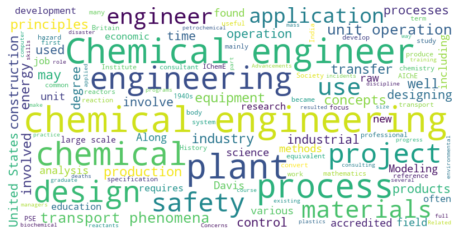

In [62]:
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400,
                background_color='white',
                stopwords=set(STOPWORDS),
                min_font_size=10).generate(file[0])
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

This word cloud does not seem optimal though, does it?
We can pre-processing as we learned to do previously.

In [97]:
# Lowercase
text = file[0].lower()

# Remove numbers from text - here we do not have digits, but you can uncomment this in case you have
text = ''.join([i for i in text if not i.isdigit()])

# Tokenize
tokens = nltk.word_tokenize(text)
text = nltk.Text(tokens)

# Best to get the lemmas of each word to reduce the number of similar words
text = [lemmatizer.lemmatize(t) for t in text]

# Remove extra charachters and punctuation
text = [''.join(re.split("[ =.,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in text]

#set the stopwords list
stopwords_wc = set(STOPWORDS)
#customised_words = ['xxx', 'yyy'] # If you want to remove any particular word form text which does not contribute much in meaning
#new_stopwords = stopwords_wc.union(customized_words)
#text = [word for word in text if word not in new_stopwords]
text = [word for word in text if word not in set(STOPWORDS)]

# After the punctuation above is removed it still leaves empty entries in the list.
text = [s for s in text if len(s) != 0]

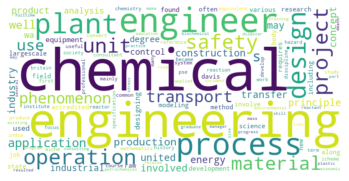

In [98]:
from collections import Counter

c = Counter(text)
wordcloud = WordCloud(width = 800, height = 400,
                background_color ='white',
                stopwords = set(STOPWORDS),
                min_font_size = 10).generate_from_frequencies(frequencies=c)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()